In [143]:
#import appropriate packages

import os
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import time
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.inspection import permutation_importance
start = time.time()
import numpy
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

# ETL

# Dataset 1 - COLET

In [2]:
#obtain wd - note all folders/files will need to be in here 

path = os.getcwd()
files = os.listdir()
files

['.ipynb_checkpoints',
 '2.csv',
 '3.csv',
 'A2 Updated Copy.ipynb',
 'A2_220477645_2022.ipynb',
 'A2_WIP.ipynb',
 'Archive',
 'C0102100',
 'Colet',
 'Data temp',
 'data.mat',
 'DBSCAN.ipynb',
 'EnsembleLearning.ipynb',
 'important.txt',
 'keras_ensemblng-master',
 'keras_ensemblng-master.zip',
 'logs',
 'Log_ROC.png',
 'Other',
 'resultsZAB_SR.mat',
 'samples',
 'SIT720_A2_220477645_2022.ipynb',
 'SIT720_A3-Copy1.ipynb',
 'SIT720_A3_220477645.ipynb',
 'SIT720_A3_TEST.ipynb',
 'SIT720_A4.ipynb',
 'SIT720_A4v2.ipynb',
 'SIT720_A4v3.ipynb',
 'SIT723v1.ipynb',
 'StackedModel.ipynb',
 'StackedModel2.ipynb',
 'StackedModelWilliam.ipynb',
 'Task1_Subject_1.xlsx',
 'Task1_Subject_2.xlsx',
 'Task1_Subject_3.xlsx',
 'Task1_Subject_4.xlsx',
 'Task1_Subject_47.xlsx',
 'Task1_Subject_5.xlsx',
 'Task1_Subject_6.xlsx',
 'Task1_Subject_7.xlsx',
 'Task1_Subject_8.xlsx',
 'Task1_Subject_9.xlsx',
 'Untitled.ipynb',
 'Untitled1.ipynb',
 'Untitled4.ipynb',
 'Untitled5.ipynb']

In [3]:
#extract all excel files 

#IMPORTANT - MAKE SURE THE COLUMN HEADERS IN THE FIRST FILE ARE ALL THERE OTHERWISE THERE WILL BE ISSUES LATER ON!

files_xlsx = [f for f in files if f[-4:] == 'xlsx']
files_xlsx

['Task1_Subject_1.xlsx',
 'Task1_Subject_2.xlsx',
 'Task1_Subject_3.xlsx',
 'Task1_Subject_4.xlsx',
 'Task1_Subject_47.xlsx',
 'Task1_Subject_5.xlsx',
 'Task1_Subject_6.xlsx',
 'Task1_Subject_7.xlsx',
 'Task1_Subject_8.xlsx',
 'Task1_Subject_9.xlsx']

In [4]:
#blank dataframe to write to 
#we need one of these for each record type (i.e. 16) otherwise we are appending to differing columns
c_gaze_task1 = pd.DataFrame()
c_gaze_task2 = pd.DataFrame()
c_gaze_task3 = pd.DataFrame()
c_gaze_task4 = pd.DataFrame()
c_pupil_task1 = pd.DataFrame()
c_pupil_task2 = pd.DataFrame()
c_pupil_task3 = pd.DataFrame()
c_pupil_task4 = pd.DataFrame()
c_blinks_task1 = pd.DataFrame()
c_blinks_task2 = pd.DataFrame()
c_blinks_task3 = pd.DataFrame()
c_blinks_task4 = pd.DataFrame()
c_annotation_task1 = pd.DataFrame()
c_annotation_task2 = pd.DataFrame()
c_annotation_task3 = pd.DataFrame()
c_annotation_task4 = pd.DataFrame()

In [5]:
#loop through files - use read_excel - note sheet name 

#c stands for COLET

for f in files_xlsx:
    #data = pd.read_excel(f)
    data1 = pd.read_excel(f, sheet_name = 0)
    data1['file'] = f
    c_gaze_task1 = c_gaze_task1.append(data1)

In [6]:
c_gaze_task1 

,gaze_timestamp,world_index,confidence,norm_pos_x,norm_pos_y,base_data,gaze_point_3d_x,gaze_point_3d_y,gaze_point_3d_z,eye_center0_3d_x,...,gaze_normal0_x,gaze_normal0_y,gaze_normal0_z,eye_center1_3d_x,eye_center1_3d_y,eye_center1_3d_z,gaze_normal1_x,gaze_normal1_y,gaze_normal1_z,file
0,5410.551715,0,0.999499,0.446264,0.846886,'5410.549631999999-0 5410.553797-1',-6.720630,-31.252881,80.700682,20.004033,...,-0.235298,-0.420213,0.876388,-39.195621,15.099793,-21.600300,0.277597,-0.391313,0.877391,Task1_Subject_1.xlsx
1,5410.555834,0,0.999653,0.446534,0.847007,'5410.557871999999-0 5410.553797-1',-6.690706,-31.298388,80.793260,20.004033,...,-0.234840,-0.420298,0.876470,-39.195621,15.099793,-21.600300,0.277597,-0.391313,0.877391,Task1_Subject_1.xlsx
2,5410.559774,0,0.999648,0.446660,0.846410,'5410.557871999999-0 5410.561675-1',-6.664575,-31.211650,80.708374,20.004033,...,-0.234840,-0.420298,0.876470,-39.195621,15.099793,-21.600300,0.278049,-0.390575,0.877576,Task1_Subject_1.xlsx
3,5410.563583,0,0.999656,0.446442,0.845542,'5410.565490999999-0 5410.561675-1',-6.689463,-31.118351,80.664979,20.004033,...,-0.235225,-0.419217,0.876885,-39.195621,15.099793,-21.600300,0.278049,-0.390575,0.877576,Task1_Subject_1.xlsx
4,5410.568291,0,0.999565,0.446472,0.845614,'5410.565490999999-0 5410.571091999999-1',-6.683464,-31.115105,80.640260,20.004033,...,-0.235225,-0.419217,0.876885,-39.195621,15.099793,-21.600300,0.278153,-0.390681,0.877496,Task1_Subject_1.xlsx
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7277,228321.640550,203,0.998400,0.475380,0.631670,'228321.642057-0 228321.63904299997-1',-4.361516,-23.527886,139.372822,17.897052,...,-0.130917,-0.241811,0.961451,-37.852364,12.526053,-25.915577,0.193580,-0.186064,0.963279,Task1_Subject_9.xlsx
7278,228321.644953,203,0.999574,0.475981,0.631705,'228321.642057-0 228321.647848-1',-4.185422,-23.313012,138.076497,17.897052,...,-0.130917,-0.241811,0.961451,-37.852364,12.526053,-25.915577,0.196042,-0.186789,0.962641,Task1_Subject_9.xlsx
7279,228321.647579,203,0.998621,0.474966,0.631155,'228321.64731099998-0 228321.647848-1',-4.383473,-23.081466,137.119705,17.897052,...,-0.132854,-0.241547,0.961252,-37.852364,12.526053,-25.915577,0.196042,-0.186789,0.962641,Task1_Subject_9.xlsx
7280,228321.650594,203,0.999000,0.476239,0.634307,'228321.65333899998-0 228321.647848-1',-4.132822,-23.675728,138.214746,17.897052,...,-0.130390,-0.245527,0.960581,-37.852364,12.526053,-25.915577,0.196042,-0.186789,0.962641,Task1_Subject_9.xlsx


In [7]:
#loop through files - use read_excel - note sheet name 

for f in files_xlsx:
    #data = pd.read_excel(f)
    data2 = pd.read_excel(f, sheet_name = 1)
    data2['file'] = f
    c_gaze_task2 = c_gaze_task2.append(data2)
   

In [8]:
c_gaze_task2

,gaze_timestamp,world_index,confidence,norm_pos_x,norm_pos_y,base_data,gaze_point_3d_x,gaze_point_3d_y,gaze_point_3d_z,eye_center0_3d_x,...,gaze_normal0_x,gaze_normal0_y,gaze_normal0_z,eye_center1_3d_x,eye_center1_3d_y,eye_center1_3d_z,gaze_normal1_x,gaze_normal1_y,gaze_normal1_z,file
0,4659.168013,0,0.999946,0.467168,0.841347,'4659.1660919999995-0 4659.169934-1',-3.465714,-28.025541,73.689623,19.490548,...,-0.216004,-0.404146,0.888824,-38.378552,14.746163,-23.063852,0.313394,-0.383356,0.868805,Task1_Subject_1.xlsx
1,4659.171724,0,0.999934,0.467982,0.841412,'4659.173514-0 4659.169934-1',-3.374369,-28.127372,73.947970,19.490548,...,-0.214639,-0.404058,0.889194,-38.378552,14.746163,-23.063852,0.313394,-0.383356,0.868805,Task1_Subject_1.xlsx
2,4659.175874,0,0.999912,0.467992,0.841952,'4659.173514-0 4659.178234999999-1',-3.372870,-28.163546,73.927925,19.490548,...,-0.214639,-0.404058,0.889194,-38.378552,14.746163,-23.063852,0.313423,-0.384043,0.868491,Task1_Subject_1.xlsx
3,4659.179746,0,0.999956,0.467042,0.841566,'4659.181258-0 4659.178234999999-1',-3.479495,-28.023615,73.637258,19.490548,...,-0.216234,-0.403766,0.888941,-38.378552,14.746163,-23.063852,0.313423,-0.384043,0.868491,Task1_Subject_1.xlsx
4,4659.183226,0,0.999976,0.467126,0.841238,'4659.181258-0 4659.185194-1',-3.466174,-27.978763,73.589596,19.490548,...,-0.216234,-0.403766,0.888941,-38.378552,14.746163,-23.063852,0.313692,-0.383646,0.868569,Task1_Subject_1.xlsx
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5400,228504.268961,169,0.556724,0.481309,0.600110,'228504.268961-0',-8.319053,-53.813592,386.637142,199.196377,...,-0.415031,0.068077,0.907257,NaN,NaN,NaN,NaN,NaN,NaN,Task1_Subject_9.xlsx
5401,228504.277133,170,0.532541,0.455582,0.613673,'228504.277133-0',-24.112588,-57.702254,379.354003,199.196377,...,-0.446618,0.060300,0.892691,NaN,NaN,NaN,NaN,NaN,NaN,Task1_Subject_9.xlsx
5402,228504.279693,170,0.997051,0.457765,0.590002,'228504.284804-0 228504.274583-1',-8.856885,-19.243240,148.062316,20.169042,...,-0.166977,-0.203570,0.964716,-40.120460,14.691800,-20.624819,0.178785,-0.184018,0.966526,Task1_Subject_9.xlsx
5403,228504.282918,170,0.997780,0.452818,0.595424,'228504.284804-0 228504.28103299998-1',-10.838604,-21.549988,159.535551,20.169042,...,-0.166977,-0.203570,0.964716,-40.120460,14.691800,-20.624819,0.157374,-0.184781,0.970098,Task1_Subject_9.xlsx


In [9]:
#loop through files - use read_excel - note sheet name 

for f in files_xlsx:
    #data = pd.read_excel(f)
    data3 = pd.read_excel(f, sheet_name = 2)
    data3['file'] = f
    c_gaze_task3 = c_gaze_task3.append(data3)
   

In [10]:
c_gaze_task3

,gaze_timestamp,world_index,confidence,norm_pos_x,norm_pos_y,base_data,gaze_point_3d_x,gaze_point_3d_y,gaze_point_3d_z,eye_center0_3d_x,...,gaze_normal0_x,gaze_normal0_y,gaze_normal0_z,eye_center1_3d_x,eye_center1_3d_y,eye_center1_3d_z,gaze_normal1_x,gaze_normal1_y,gaze_normal1_z,file
0,4925.733554,0,0.999807,0.455139,0.829161,'4925.733566-0 4925.733541-1',-5.210845,-28.369822,77.211448,21.275608,...,-0.245195,-0.411069,0.878010,-39.742654,14.772697,-20.876477,0.306528,-0.377348,0.873870,Task1_Subject_1.xlsx
1,4925.737495,0,0.999896,0.455489,0.827894,'4925.733566-0 4925.741424-1',-5.148993,-28.190206,77.013647,21.275608,...,-0.245195,-0.411069,0.878010,-39.742654,14.772697,-20.876477,0.307662,-0.375822,0.874130,Task1_Subject_1.xlsx
2,4925.741473,0,0.999911,0.455146,0.828076,'4925.741521999999-0 4925.741424-1',-5.186693,-28.163240,76.895547,21.275608,...,-0.245780,-0.411400,0.877691,-39.742654,14.772697,-20.876477,0.307662,-0.375822,0.874130,Task1_Subject_1.xlsx
3,4925.745420,0,0.999885,0.454981,0.828821,'4925.741521999999-0 4925.749317999999-1',-5.215824,-28.258688,76.985009,21.275608,...,-0.245780,-0.411400,0.877691,-39.742654,14.772697,-20.876477,0.307127,-0.376733,0.873925,Task1_Subject_1.xlsx
4,4925.749386,0,0.999868,0.454758,0.828875,'4925.749452999999-0 4925.749317999999-1',-5.240436,-28.236476,76.910377,21.275608,...,-0.246163,-0.411530,0.877523,-39.742654,14.772697,-20.876477,0.307127,-0.376733,0.873925,Task1_Subject_1.xlsx
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15190,227926.280984,351,0.999084,0.577568,0.515940,'227926.28500399998-0 227926.27696299998-1',18.936924,-8.713000,140.128402,21.858422,...,-0.018743,-0.162341,0.986557,-34.548309,13.134973,-26.263953,0.303512,-0.122491,0.944921,Task1_Subject_9.xlsx
15191,227926.285003,352,0.998244,0.579733,0.519930,'227926.28500399998-0 227926.285002-1',19.059397,-9.049177,137.359910,21.858422,...,-0.018743,-0.162341,0.986557,-34.548309,13.134973,-26.263953,0.309119,-0.131280,0.941919,Task1_Subject_9.xlsx
15192,227926.289027,352,0.996593,0.581765,0.516821,'227926.28500399998-0 227926.293051-1',19.106148,-8.476573,134.455112,21.858422,...,-0.018743,-0.162341,0.986557,-34.548309,13.134973,-26.263953,0.314391,-0.129470,0.940423,Task1_Subject_9.xlsx
15193,227926.293049,352,0.996438,0.582387,0.518000,'227926.29304699998-0 227926.293051-1',19.340557,-8.665963,135.113591,21.858422,...,-0.017040,-0.163435,0.986407,-34.548309,13.134973,-26.263953,0.314391,-0.129470,0.940423,Task1_Subject_9.xlsx


In [11]:
#loop through files - use read_excel - note sheet name 

for f in files_xlsx:
    #data = pd.read_excel(f)
    data4 = pd.read_excel(f, sheet_name = 3)
    data4['file'] = f
    c_gaze_task4 = c_gaze_task4.append(data4)
   

In [12]:
c_gaze_task4 

,gaze_timestamp,world_index,confidence,norm_pos_x,norm_pos_y,base_data,gaze_point_3d_x,gaze_point_3d_y,gaze_point_3d_z,eye_center0_3d_x,...,gaze_normal0_x,gaze_normal0_y,gaze_normal0_z,eye_center1_3d_x,eye_center1_3d_y,eye_center1_3d_z,gaze_normal1_x,gaze_normal1_y,gaze_normal1_z,file
0,5186.936018,0,0.999910,0.429778,0.894138,'5186.937763-0 5186.934273-1',-7.849854,-30.436482,68.829957,18.763117,...,-0.255538,-0.444614,0.858498,-37.711558,15.192075,-24.476072,0.276384,-0.423655,0.862629,Task1_Subject_1.xlsx
1,5186.939908,0,0.999884,0.429607,0.893521,'5186.937763-0 5186.942054-1',-7.883667,-30.444688,68.959266,18.763117,...,-0.255538,-0.444614,0.858498,-37.711558,15.192075,-24.476072,0.275779,-0.422871,0.863207,Task1_Subject_1.xlsx
2,5186.944288,0,0.999771,0.429758,0.893629,'5186.946523-0 5186.942054-1',-7.869988,-30.470123,68.998894,18.763117,...,-0.255302,-0.444724,0.858511,-37.711558,15.192075,-24.476072,0.275779,-0.422871,0.863207,Task1_Subject_1.xlsx
3,5186.947952,0,0.999775,0.429542,0.893677,'5186.946523-0 5186.949380999999-1',-7.913816,-30.541058,69.147955,18.763117,...,-0.255302,-0.444724,0.858511,-37.711558,15.192075,-24.476072,0.274999,-0.422905,0.863439,Task1_Subject_1.xlsx
4,5186.951829,0,0.999893,0.430029,0.894655,'5186.954277-0 5186.949380999999-1',-7.868716,-30.663442,69.251569,18.763117,...,-0.254523,-0.445863,0.858152,-37.711558,15.192075,-24.476072,0.274999,-0.422905,0.863439,Task1_Subject_1.xlsx
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16688,222043.332706,272,0.999866,0.515607,0.439272,'222043.33090499998-0 222043.334508-1',3.434937,0.810220,101.123017,19.681803,...,-0.131417,-0.123440,0.983612,-39.328648,14.802702,-21.524028,0.327293,-0.097566,0.939872,Task1_Subject_9.xlsx
16689,222043.336530,273,0.999767,0.514888,0.438728,'222043.33855199997-0 222043.334508-1',3.305292,0.857062,100.751790,19.681803,...,-0.132847,-0.123353,0.983431,-39.328648,14.802702,-21.524028,0.327293,-0.097566,0.939872,Task1_Subject_9.xlsx
16690,222043.340519,273,0.999846,0.514192,0.439384,'222043.33855199997-0 222043.34248599998-1',3.213693,0.802417,101.432418,19.681803,...,-0.132847,-0.123353,0.983431,-39.328648,14.802702,-21.524028,0.325053,-0.097289,0.940678,Task1_Subject_9.xlsx
16691,222043.344584,273,0.999875,0.508943,0.436278,'222043.346681-0 222043.34248599998-1',2.293070,1.059562,98.765386,19.681803,...,-0.143193,-0.123958,0.981901,-39.328648,14.802702,-21.524028,0.325053,-0.097289,0.940678,Task1_Subject_9.xlsx


In [13]:
#loop through files - use read_excel - note sheet name 

for f in files_xlsx:
    #data = pd.read_excel(f)
    data5 = pd.read_excel(f, sheet_name = 4)
    data5['file'] = f
    c_pupil_task1 = c_pupil_task1.append(data5)
   

In [14]:
c_pupil_task1

,pupil_timestamp,world_index,eye_id,confidence,norm_pos_x,norm_pos_y,diameter,method,ellipse_center_x,ellipse_center_y,...,circle_3d_normal_z,circle_3d_radius,theta,phi,projected_sphere_center_x,projected_sphere_center_y,projected_sphere_axis_a,projected_sphere_axis_b,projected_sphere_angle,file
0,5410.553797,0,1,1.000000,0.406205,0.708513,40.757561,'2d c++',77.991356,55.965595,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Task1_Subject_1.xlsx
1,5410.553797,0,1,0.999646,0.406235,0.708578,40.764095,'3d c++',77.997212,55.953014,...,-0.714380,1.971798,1.419294,-2.333954,145.942173,79.574077,187.867489,187.867489,90.0,Task1_Subject_1.xlsx
2,5410.557872,0,0,0.999661,0.326001,0.395972,38.729047,'3d c++',62.592283,115.973389,...,-0.699703,1.889488,1.768446,-2.346975,134.652012,92.929580,188.411042,188.411042,90.0,Task1_Subject_1.xlsx
3,5410.557872,0,0,1.000000,0.325980,0.396084,38.723305,'2d c++',62.588215,115.951805,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Task1_Subject_1.xlsx
4,5410.561675,0,1,1.000000,0.406046,0.707954,40.842903,'2d c++',77.960808,56.072765,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Task1_Subject_1.xlsx
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14563,228321.647848,203,1,0.999606,0.426659,0.778340,24.352078,'3d c++',81.918465,42.558716,...,-0.780547,2.011465,1.377815,-2.222073,119.742628,62.863100,119.966404,119.966404,90.0,Task1_Subject_9.xlsx
14564,228321.653339,203,0,0.998394,0.255469,0.366622,27.203977,'3d c++',49.049963,121.608670,...,-0.829398,2.073524,1.875600,-2.087452,87.795905,97.738241,127.903724,127.903724,90.0,Task1_Subject_9.xlsx
14565,228321.653339,203,0,1.000000,0.255535,0.366481,27.202360,'2d c++',49.062664,121.635742,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Task1_Subject_9.xlsx
14566,228321.653422,203,1,1.000000,0.427468,0.778334,24.366371,'2d c++',82.073883,42.559826,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Task1_Subject_9.xlsx


In [15]:
#loop through files - use read_excel - note sheet name 

for f in files_xlsx:
    #data = pd.read_excel(f)
    data6 = pd.read_excel(f, sheet_name = 5)
    data6['file'] = f
    c_pupil_task2 = c_pupil_task2.append(data6)
   

In [16]:
c_pupil_task2

,pupil_timestamp,world_index,eye_id,confidence,norm_pos_x,norm_pos_y,diameter,method,ellipse_center_x,ellipse_center_y,...,circle_3d_normal_z,circle_3d_radius,theta,phi,projected_sphere_center_x,projected_sphere_center_y,projected_sphere_axis_a,projected_sphere_axis_b,projected_sphere_angle,file
0,4659.169934,0,1,1.000000,0.383349,0.709518,39.585670,'2d c++',73.602982,55.772636,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Task1_Subject_1.xlsx
1,4659.169934,0,1,0.999989,0.383349,0.709497,39.582783,'3d c++',73.602915,55.776529,...,-0.691045,2.047310,1.432883,-2.369453,141.816092,76.930217,179.758212,179.758212,90.0,Task1_Subject_1.xlsx
2,4659.173514,0,0,1.000000,0.348162,0.349042,37.972534,'2d c++',66.847015,124.983849,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Task1_Subject_1.xlsx
3,4659.173514,0,0,0.999880,0.348163,0.349008,37.976604,'3d c++',66.847372,124.990553,...,-0.718888,1.948367,1.753716,-2.321682,133.439111,102.086138,179.930302,179.930302,90.0,Task1_Subject_1.xlsx
4,4659.178235,0,1,0.999944,0.383273,0.709904,39.386227,'3d c++',73.588462,55.698340,...,-0.690810,2.037330,1.432163,-2.369687,141.816092,76.930217,179.758212,179.758212,90.0,Task1_Subject_1.xlsx
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10805,228504.277133,170,0,0.532541,0.241354,0.372993,29.150211,'3d c++',46.340059,120.385292,...,-0.821699,1.978581,1.833248,-2.124023,91.946413,97.273119,140.664522,140.664522,90.0,Task1_Subject_9.xlsx
10806,228504.281033,170,1,0.997363,0.439062,0.773366,26.222113,'3d c++',84.299861,43.513771,...,-0.802517,1.880712,1.371450,-2.182395,124.057740,66.722506,134.132280,134.132280,90.0,Task1_Subject_9.xlsx
10807,228504.281033,170,1,1.000000,0.439124,0.773477,26.256786,'2d c++',84.311890,43.492386,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Task1_Subject_9.xlsx
10808,228504.284804,170,0,0.990000,0.243847,0.375693,28.903830,'2d c++',46.818550,119.867004,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Task1_Subject_9.xlsx


In [17]:
#loop through files - use read_excel - note sheet name 

for f in files_xlsx:
    #data = pd.read_excel(f)
    data7 = pd.read_excel(f, sheet_name = 6)
    data7['file'] = f
    c_pupil_task3 = c_pupil_task3.append(data7)
   

In [18]:
c_pupil_task3

,pupil_timestamp,world_index,eye_id,confidence,norm_pos_x,norm_pos_y,diameter,method,ellipse_center_x,ellipse_center_y,...,circle_3d_normal_z,circle_3d_radius,theta,phi,projected_sphere_center_x,projected_sphere_center_y,projected_sphere_axis_a,projected_sphere_axis_b,projected_sphere_angle,file
0,4925.733541,0,1,0.999716,0.396698,0.717863,39.984980,'3d c++',76.166063,54.170372,...,-0.697941,1.882471,1.438231,-2.360411,148.217415,76.821010,192.722410,192.722410,90.0,Task1_Subject_1.xlsx
1,4925.733541,0,1,1.000000,0.396681,0.717742,39.968163,'2d c++',76.162796,54.193523,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Task1_Subject_1.xlsx
2,4925.733566,0,0,1.000000,0.336370,0.370211,38.975426,'2d c++',64.582977,120.919556,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Task1_Subject_1.xlsx
3,4925.733566,0,0,0.999898,0.336366,0.370172,38.979005,'3d c++',64.582350,120.927035,...,-0.695439,1.788076,1.757177,-2.355361,140.381627,96.652712,197.635498,197.635498,90.0,Task1_Subject_1.xlsx
4,4925.741424,0,1,0.999894,0.396292,0.716681,40.184041,'3d c++',76.088124,54.397321,...,-0.697569,1.892244,1.439996,-2.361170,148.217415,76.821010,192.722410,192.722410,90.0,Task1_Subject_1.xlsx
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30389,227926.293047,352,0,1.000000,0.348153,0.406389,29.538328,'2d c++',66.845345,113.973282,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Task1_Subject_9.xlsx
30390,227926.293051,352,1,0.993435,0.207927,0.697924,25.591635,'3d c++',39.921905,57.998587,...,-0.724845,2.155768,1.490398,-2.327368,89.393333,68.655088,120.008688,120.008688,90.0,Task1_Subject_9.xlsx
30391,227926.293051,352,1,1.000000,0.207900,0.697688,25.531675,'2d c++',39.916801,58.043934,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Task1_Subject_9.xlsx
30392,227926.300983,352,0,1.000000,0.348298,0.406876,29.606018,'2d c++',66.873276,113.879822,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Task1_Subject_9.xlsx


In [19]:
#loop through files - use read_excel - note sheet name 

for f in files_xlsx:
    #data = pd.read_excel(f)
    data8 = pd.read_excel(f, sheet_name = 7)
    data8['file'] = f
    c_pupil_task4 = c_pupil_task4.append(data8)
   

In [20]:
c_pupil_task4

,pupil_timestamp,world_index,eye_id,confidence,norm_pos_x,norm_pos_y,diameter,method,ellipse_center_x,ellipse_center_y,...,circle_3d_normal_z,circle_3d_radius,theta,phi,projected_sphere_center_x,projected_sphere_center_y,projected_sphere_axis_a,projected_sphere_axis_b,projected_sphere_angle,file
0,5186.934273,0.0,1.0,0.999998,0.406175,0.712463,41.279886,'3d c++',77.985519,55.207111,...,-0.704411,2.239127,1.384710,-2.342411,140.421651,79.844078,172.482422,172.482422,90.0,Task1_Subject_1.xlsx
1,5186.934273,0.0,1.0,1.000000,0.406178,0.712473,41.281082,'2d c++',77.986107,55.205215,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Task1_Subject_1.xlsx
2,5186.937763,0.0,0.0,1.000000,0.310229,0.395438,39.079651,'2d c++',59.563965,116.075829,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Task1_Subject_1.xlsx
3,5186.937763,0.0,0.0,0.999822,0.310204,0.395425,39.081583,'3d c++',59.559194,116.078464,...,-0.676369,2.057287,1.792133,-2.375560,129.829297,92.260623,178.962427,178.962427,90.0,Task1_Subject_1.xlsx
4,5186.942054,0.0,1.0,0.999945,0.406465,0.712099,41.363808,'3d c++',78.041339,55.277064,...,-0.705116,2.243082,1.385460,-2.341527,140.421651,79.844078,172.482422,172.482422,90.0,Task1_Subject_1.xlsx
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20793,228726.478543,259.0,1.0,0.999965,0.378432,0.739606,24.790353,'3d c++',72.658891,49.995616,...,-0.711201,1.791460,1.425259,-2.339517,123.385082,67.758723,136.440632,136.440632,90.0,Task1_Subject_9.xlsx
20794,228726.489491,259.0,1.0,1.000000,0.379734,0.742002,25.275154,'2d c++',72.908890,49.535595,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Task1_Subject_9.xlsx
20795,228726.489491,259.0,1.0,0.999555,0.379731,0.741950,25.261811,'3d c++',72.908278,49.545545,...,-0.713090,1.824365,1.420014,-2.335953,123.385082,67.758723,136.440632,136.440632,90.0,Task1_Subject_9.xlsx
20796,228726.490165,259.0,0.0,0.998256,0.230248,0.363101,28.222856,'3d c++',44.207595,122.284655,...,-0.892675,1.676591,1.795483,-1.984366,86.552960,98.969429,153.198023,153.198023,90.0,Task1_Subject_9.xlsx


In [21]:
#loop through files - use read_excel - note sheet name 

for f in files_xlsx:
    #data = pd.read_excel(f)
    data9 = pd.read_excel(f, sheet_name = 8)
    data9['file'] = f
    c_blinks_task1 = c_blinks_task1.append(data9)
   

In [22]:
c_blinks_task1 

,ID,start_timestamp,duration,end_timestamp,start_frame_index,index,end_frame_index,confidence,filter_response,base_Data,file
0,1,5437.625617,0.236131,5437.861748,37,40,44,0.703872,'0.5068225043614704 0.5512669488059149 0.59571...,'5437.625617 5437.629564 5437.633621 5437.6378...,Task1_Subject_1.xlsx
1,2,5444.161561,0.180073,5444.341634,231,233,236,0.553669,'0.5048782729116744 0.5493227173561188 0.59287...,'5444.161561 5444.165642 5444.169793 5444.1755...,Task1_Subject_1.xlsx
0,1,52343.299652,0.208204,52343.507856,28,31,34,0.497812,'0.5083233621335544 0.552767806577999 0.597212...,'52343.299652 52343.303448 52343.307718000004 ...,Task1_Subject_3.xlsx
1,2,52351.271180,0.604479,52351.875659,266,275,284,0.268740,'0.5147965783708606 0.44519374716612836 0.4577...,'52351.27118 52351.275434 52351.279182 52351.2...,Task1_Subject_3.xlsx
2,1,52353.379248,0.263982,52353.643230,21,25,29,0.542674,'0.5349907679353413 0.5822504642600077 0.62330...,'52353.379248 52353.386182 52353.387143 52353....,Task1_Subject_3.xlsx
3,1,52361.799089,0.164946,52361.964035,29,31,34,0.540459,'0.5018592554834781 0.5463036999279226 0.59074...,'52361.799089 52361.806158 52361.807276 52361....,Task1_Subject_3.xlsx
4,1,52367.791491,0.224953,52368.016444,29,32,36,0.561267,'0.5407997933944411 0.5852442378388855 0.62968...,'52367.791491 52367.795185 52367.799383 52367....,Task1_Subject_3.xlsx
5,1,52377.051408,0.219801,52377.271209,20,23,27,0.609915,'0.503231993550923 0.5500859597340555 0.594530...,'52377.051408 52377.059281 52377.070968 52377....,Task1_Subject_3.xlsx
0,1,130457.281331,0.160055,130457.441386,42,44,46,0.453988,'0.5216538174149146 0.5220982618593587 0.52254...,'130457.281331 130457.289846 130457.289848 130...,Task1_Subject_4.xlsx
0,1,215452.435858,0.363635,215452.799493,127,132,138,0.342688,'0.5197906829645088 0.545352908025943 0.553047...,'215452.43585799998 215452.442801 215452.44353...,Task1_Subject_7.xlsx


In [23]:
#loop through files - use read_excel - note sheet name 

for f in files_xlsx:
    #data = pd.read_excel(f)
    data10 = pd.read_excel(f, sheet_name = 9)
    data10['file'] = f
    c_blinks_task2 = c_blinks_task2.append(data10)
   

In [24]:
c_blinks_task2

,ID,start_timestamp,duration,end_timestamp,start_frame_index,index,end_frame_index,confidence,filter_response,base_Data,file
0,1,51644.207383,0.521524,51644.728907,246,254,262,0.277761,'0.528993998250003 0.5159779134200366 0.537140...,'51644.207383 51644.211833 51644.216024 51644....,Task1_Subject_3.xlsx
1,1,51653.099402,0.312177,51653.411579,213,218,223,0.294713,'0.5135580453080789 0.5302985577358857 0.57474...,'51653.099402 51653.103442 51653.107426 51653....,Task1_Subject_3.xlsx
2,1,51655.287540,0.212070,51655.499610,46,49,52,0.662804,'0.5341177971267324 0.5785622415711769 0.62300...,'51655.28754 51655.292708 51655.295653 51655.2...,Task1_Subject_3.xlsx
3,1,51675.564079,0.207355,51675.771434,16,19,22,0.544197,'0.5072108906156224 0.5074451554132569 0.57445...,'51675.564079 51675.569274 51675.571386 51675....,Task1_Subject_3.xlsx
0,1,129931.605323,0.292218,129931.897541,15,19,23,0.361384,'0.5220893828912623 0.5683856791875584 0.61468...,'129931.605323 129931.609378 129931.613352 129...,Task1_Subject_4.xlsx
0,1,141358.950662,0.176276,141359.126938,14,16,19,0.545257,'0.5249502830550355 0.541279172090658 0.585723...,'141358.950662 141358.95468 141358.95889799998...,Task1_Subject_5.xlsx
0,1,214360.371825,0.212022,214360.583847,33,36,39,0.426338,'0.5167066931505118 0.5265035534932555 0.57066...,'214360.37182499998 214360.37972599998 214360....,Task1_Subject_7.xlsx
1,2,214365.655808,0.196980,214365.852788,191,194,197,0.535739,'0.518129288206382 0.554392756736825 0.5909822...,'214365.65580799998 214365.66002699998 214365....,Task1_Subject_7.xlsx
2,1,214380.860131,0.191636,214381.051767,136,139,142,0.479152,'0.5059362232143253 0.549435941324092 0.583694...,'214380.860131 214380.860165 214380.867688 214...,Task1_Subject_7.xlsx
3,2,214383.207840,0.204648,214383.412488,206,209,213,0.513411,'0.5073330772013557 0.5294059773106881 0.57593...,'214383.20784 214383.20784199997 214383.215703...,Task1_Subject_7.xlsx


In [25]:
#loop through files - use read_excel - note sheet name 

for f in files_xlsx:
    #data = pd.read_excel(f)
    data11 = pd.read_excel(f, sheet_name = 10)
    data11['file'] = f
    c_blinks_task3 = c_blinks_task3.append(data11)
   

In [26]:
c_blinks_task3

,ID,start_timestamp,duration,end_timestamp,start_frame_index,index,end_frame_index,confidence,filter_response,base_Data,file
0,1,4937.633752,0.219501,4937.853253,355,358,362,0.632858,'0.5145911521303596 0.559035596574804 0.603480...,'4937.633752 4937.637365 4937.642261 4937.6454...,Task1_Subject_1.xlsx
1,2,4938.933606,0.179660,4939.113266,394,396,399,0.594492,'0.5276674487690183 0.5721118932134627 0.61655...,'4938.933606 4938.9373909999995 4938.943244999...,Task1_Subject_1.xlsx
2,3,4942.313627,0.219615,4942.533242,495,498,501,0.643151,'0.5229700933989672 0.5674145378434114 0.61185...,'4942.3136269999995 4942.317322 4942.321507 49...,Task1_Subject_1.xlsx
3,1,4948.394007,0.575348,4948.969355,2,10,19,0.334890,'0.5038569896286232 0.5483014340730676 0.59274...,'4948.394007 4948.397762 4948.4018829999995 49...,Task1_Subject_1.xlsx
4,2,4949.149379,0.175898,4949.325277,25,27,30,0.562926,'0.5131920799712788 0.5576365244157233 0.60208...,'4949.1493789999995 4949.1532959999995 4949.15...,Task1_Subject_1.xlsx
...,...,...,...,...,...,...,...,...,...,...,...
14,2,227905.829044,0.156031,227905.985075,40,42,44,0.503004,'0.5364642300849053 0.5537179306930612 0.56773...,'227905.82904399998 227905.833184 227905.83983...,Task1_Subject_9.xlsx
15,3,227907.771639,0.189371,227907.961010,98,100,103,0.593344,'0.5201340369365625 0.566430333232859 0.612726...,'227907.77163899998 227907.77419599998 227907....,Task1_Subject_9.xlsx
16,1,227917.701956,0.167014,227917.868970,96,98,101,0.536342,'0.5121475304497234 0.5584438267460199 0.60474...,'227917.70195599998 227917.70895899998 227917....,Task1_Subject_9.xlsx
17,2,227919.121020,0.183983,227919.305003,138,141,144,0.598228,'0.5153427691335349 0.5616390654298312 0.58871...,'227919.12102 227919.12117199998 227919.128994...,Task1_Subject_9.xlsx


In [27]:
#loop through files - use read_excel - note sheet name 

for f in files_xlsx:
    #data = pd.read_excel(f)
    data12 = pd.read_excel(f, sheet_name = 11)
    data12['file'] = f
    c_blinks_task4 = c_blinks_task4.append(data12)
   

In [28]:
c_blinks_task4

,ID,start_timestamp,duration,end_timestamp,start_frame_index,index,end_frame_index,confidence,filter_response,base_Data,file
0,1,5200.489894,0.628398,5201.118292,122,131,141,0.390568,'0.5071523680042445 0.551596812448689 0.596041...,'5200.489893999999 5200.493501 5200.497832 520...,Task1_Subject_1.xlsx
1,2,5201.585551,0.248134,5201.833685,155,158,162,0.624402,'0.5121954566591707 0.556639901103615 0.601084...,'5201.585551 5201.589585 5201.595933 5201.5976...,Task1_Subject_1.xlsx
0,1,90997.116431,0.208093,90997.324524,59,62,65,0.589238,'0.5088037159434569 0.5532481603879015 0.59769...,'90997.116431 90997.121122 90997.124455 90997....,Task1_Subject_2.xlsx
1,2,90997.652829,0.279633,90997.932462,75,79,83,0.634712,'0.5391463337742395 0.5835907782186839 0.62803...,'90997.652829 90997.656448 90997.660702 90997....,Task1_Subject_2.xlsx
2,3,91002.054042,0.214465,91002.268507,206,209,213,0.606721,'0.5076595276903548 0.5521039721347994 0.59654...,'91002.054042 91002.056646 91002.060434 91002....,Task1_Subject_2.xlsx
...,...,...,...,...,...,...,...,...,...,...,...
8,3,228712.420777,0.168113,228712.588890,287,289,292,0.554141,'0.5037201405857574 0.5500164368820537 0.59631...,'228712.420777 228712.420938 228712.428812 228...,Task1_Subject_9.xlsx
9,1,228718.560785,0.132246,228718.693031,23,25,27,0.417348,'0.531989059581162 0.5406546851960738 0.548623...,'228718.56078499998 228718.56080099999 228718....,Task1_Subject_9.xlsx
10,2,228719.464743,0.168152,228719.632895,50,52,55,0.534863,'0.5009343921762599 0.5472306884725565 0.57108...,'228719.464743 228719.46478399998 228719.47291...,Task1_Subject_9.xlsx
11,3,228719.940827,0.164094,228720.104921,64,66,69,0.507862,'0.5114266499435292 0.5577229462398255 0.58064...,'228719.94082699998 228719.94083399998 228719....,Task1_Subject_9.xlsx


In [29]:
#loop through files - use read_excel - note sheet name 

for f in files_xlsx:
    #data = pd.read_excel(f)
    data13 = pd.read_excel(f, sheet_name = 12)
    data13['file'] = f
    c_annotation_task1 = c_annotation_task1.append(data13)
   

In [30]:
c_annotation_task1

,mental_1,physical_1,temporal_1,perforamnce_1,effort_1,frustation_1,mean_1,file
0,10,5,15,25,25,10,15.0,Task1_Subject_1.xlsx
0,20,10,20,10,20,15,15.8,Task1_Subject_2.xlsx
0,5,5,5,0,5,5,4.2,Task1_Subject_3.xlsx
0,35,45,55,40,45,15,39.2,Task1_Subject_4.xlsx
0,5,5,5,0,10,5,5.0,Task1_Subject_47.xlsx
0,15,15,5,50,50,5,23.3,Task1_Subject_5.xlsx
0,30,30,30,25,30,5,25.0,Task1_Subject_6.xlsx
0,15,15,25,0,40,5,16.7,Task1_Subject_7.xlsx
0,10,10,50,20,10,5,17.5,Task1_Subject_8.xlsx
0,5,5,5,15,5,5,6.7,Task1_Subject_9.xlsx


In [31]:
#loop through files - use read_excel - note sheet name 

for f in files_xlsx:
    #data = pd.read_excel(f)
    data14 = pd.read_excel(f, sheet_name = 13)
    data14['file'] = f
    c_annotation_task2 = c_annotation_task2.append(data14)
   

In [32]:
c_annotation_task2

,mental_1,physical_1,temporal_1,perforamnce_1,effort_1,frustation_1,mean_1,file
0,50,30,25,50,15,25,32.5,Task1_Subject_1.xlsx
0,50,10,60,30,30,25,34.2,Task1_Subject_2.xlsx
0,15,10,10,0,15,5,9.2,Task1_Subject_3.xlsx
0,60,45,80,50,45,20,50.0,Task1_Subject_4.xlsx
0,10,5,5,45,20,10,15.8,Task1_Subject_47.xlsx
0,10,5,5,50,10,5,14.2,Task1_Subject_5.xlsx
0,60,45,45,30,60,5,40.8,Task1_Subject_6.xlsx
0,75,90,15,45,95,90,68.3,Task1_Subject_7.xlsx
0,10,10,30,25,10,10,15.8,Task1_Subject_8.xlsx
0,5,5,10,25,5,5,9.2,Task1_Subject_9.xlsx


In [33]:
#loop through files - use read_excel - note sheet name 

for f in files_xlsx:
    #data = pd.read_excel(f)
    data15 = pd.read_excel(f, sheet_name = 14)
    data15['file'] = f
    c_annotation_task3 = c_annotation_task3.append(data15)
   

In [34]:
c_annotation_task3

,mental_1,physical_1,temporal_1,perforamnce_1,effort_1,frustation_1,mean_1,file
0,100,10,75,80,90,20,62.5,Task1_Subject_1.xlsx
0,50,10,20,25,50,20,29.2,Task1_Subject_2.xlsx
0,80,15,55,45,50,25,45.0,Task1_Subject_3.xlsx
0,70,80,70,70,70,50,68.3,Task1_Subject_4.xlsx
0,50,10,20,50,75,10,35.8,Task1_Subject_47.xlsx
0,85,5,50,70,65,10,47.5,Task1_Subject_5.xlsx
0,70,70,70,60,60,15,57.5,Task1_Subject_6.xlsx
0,90,100,50,10,100,25,62.5,Task1_Subject_7.xlsx
0,25,10,25,40,40,20,26.7,Task1_Subject_8.xlsx
0,85,5,70,85,80,65,65.0,Task1_Subject_9.xlsx


In [35]:
#loop through files - use read_excel - note sheet name 

for f in files_xlsx:
    #data = pd.read_excel(f)
    data16 = pd.read_excel(f, sheet_name = 15)
    data16['file'] = f
    c_annotation_task4 = c_annotation_task4.append(data16)
   

In [36]:
c_annotation_task4

,mental_1,physical_1,temporal_1,perforamnce_1,effort_1,frustation_1,mean_1,file
0,60,15,45,50,20,25,35.8,Task1_Subject_1.xlsx
0,85,10,90,90,80,85,73.3,Task1_Subject_2.xlsx
0,55,10,15,15,30,10,22.5,Task1_Subject_3.xlsx
0,75,70,80,60,80,40,67.5,Task1_Subject_4.xlsx
0,50,5,10,10,50,5,21.7,Task1_Subject_47.xlsx
0,90,95,70,85,85,75,83.3,Task1_Subject_5.xlsx
0,80,80,80,60,80,5,64.2,Task1_Subject_6.xlsx
0,50,25,50,15,50,15,34.2,Task1_Subject_7.xlsx
0,60,10,50,60,50,50,46.7,Task1_Subject_8.xlsx
0,90,80,90,70,80,35,74.2,Task1_Subject_9.xlsx


In [37]:
#not going to use the below - don't think subject info is important to analysis but leaving code in here in case I change my mind 

#for f in files_xlsx:
#    #data = pd.read_excel(f)
#    data = pd.read_excel(f, sheet_index = [16])
#    data['file'] = f
#    c_subjectinfo = df.append(data)
   

In [38]:
#check that the naming has worked
print(c_gaze_task1['file'].unique())

['Task1_Subject_1.xlsx' 'Task1_Subject_2.xlsx' 'Task1_Subject_3.xlsx'
 'Task1_Subject_4.xlsx' 'Task1_Subject_47.xlsx' 'Task1_Subject_5.xlsx'
 'Task1_Subject_6.xlsx' 'Task1_Subject_7.xlsx' 'Task1_Subject_8.xlsx'
 'Task1_Subject_9.xlsx']


In [39]:
#only interested in specific columns, so we will drop everything except those
#note that the 'file' column is the 'participant'

#Gaze data
c_gaze_task1 = c_gaze_task1.iloc[:, [0,6,7,8,21]]
c_gaze_task2 = c_gaze_task2.iloc[:, [0,6,7,8,21]]
c_gaze_task3 = c_gaze_task3.iloc[:, [0,6,7,8,21]]
c_gaze_task4 = c_gaze_task4.iloc[:, [0,6,7,8,21]]

#Pupil data
c_pupil_task1 = c_pupil_task1.iloc[:, [6,34]]
c_pupil_task2 = c_pupil_task2.iloc[:, [6,34]]
c_pupil_task3 = c_pupil_task3.iloc[:, [6,34]]
c_pupil_task4 = c_pupil_task4.iloc[:, [6,34]]

#Blink data - indx and file
c_blinks_task1 = c_blinks_task1.iloc[:, [5,10]]
c_blinks_task2 = c_blinks_task2.iloc[:, [5,10]]
c_blinks_task3 = c_blinks_task3.iloc[:, [5,10]]
c_blinks_task4 = c_blinks_task4.iloc[:, [5,10]]

#annotation data - mean and file
c_annotation_task1 = c_annotation_task1.iloc[:, [6,7]]
c_annotation_task2 = c_annotation_task2.iloc[:, [6,7]]
c_annotation_task3 = c_annotation_task3.iloc[:, [6,7]]
c_annotation_task4 = c_annotation_task4.iloc[:, [6,7]]

In [40]:
#get the difference between the previous value for each row

#Task 1
c_gaze_task1.sort_values(['file'], inplace=True)
c_gaze_task1['gaze_diff'] = c_gaze_task1.groupby('file')['gaze_timestamp'].diff()
c_gaze_task1['x_diff'] = c_gaze_task1.groupby('file')['gaze_point_3d_x'].diff()
c_gaze_task1['y_diff'] = c_gaze_task1.groupby('file')['gaze_point_3d_y'].diff()
c_gaze_task1['z_diff'] = c_gaze_task1.groupby('file')['gaze_point_3d_z'].diff()
c_gaze_task1['z_diff'] = c_gaze_task1.groupby('file')['gaze_point_3d_z'].diff()

#Task 2
c_gaze_task2.sort_values(['file'], inplace=True)
c_gaze_task2['gaze_diff'] = c_gaze_task2.groupby('file')['gaze_timestamp'].diff()
c_gaze_task2['x_diff'] = c_gaze_task2.groupby('file')['gaze_point_3d_x'].diff()
c_gaze_task2['y_diff'] = c_gaze_task2.groupby('file')['gaze_point_3d_y'].diff()
c_gaze_task2['z_diff'] = c_gaze_task2.groupby('file')['gaze_point_3d_z'].diff()
c_gaze_task2['z_diff'] = c_gaze_task2.groupby('file')['gaze_point_3d_z'].diff()

#Task 3
c_gaze_task3.sort_values(['file'], inplace=True)
c_gaze_task3['gaze_diff'] = c_gaze_task3.groupby('file')['gaze_timestamp'].diff()
c_gaze_task3['x_diff'] = c_gaze_task3.groupby('file')['gaze_point_3d_x'].diff()
c_gaze_task3['y_diff'] = c_gaze_task3.groupby('file')['gaze_point_3d_y'].diff()
c_gaze_task3['z_diff'] = c_gaze_task3.groupby('file')['gaze_point_3d_z'].diff()
c_gaze_task3['z_diff'] = c_gaze_task3.groupby('file')['gaze_point_3d_z'].diff()

#Task 4
c_gaze_task4.sort_values(['file'], inplace=True)
c_gaze_task4['gaze_diff'] = c_gaze_task4.groupby('file')['gaze_timestamp'].diff()
c_gaze_task4['x_diff'] = c_gaze_task4.groupby('file')['gaze_point_3d_x'].diff()
c_gaze_task4['y_diff'] = c_gaze_task4.groupby('file')['gaze_point_3d_y'].diff()
c_gaze_task4['z_diff'] = c_gaze_task4.groupby('file')['gaze_point_3d_z'].diff()
c_gaze_task4['z_diff'] = c_gaze_task4.groupby('file')['gaze_point_3d_z'].diff()

In [41]:
#square x, y and z

#Task 1
c_gaze_task1['x_diff^2'] = c_gaze_task1['x_diff']**2
c_gaze_task1['y_diff^2'] = c_gaze_task1['y_diff']**2
c_gaze_task1['z_diff^2'] = c_gaze_task1['z_diff']**2

#Task 2
c_gaze_task2['x_diff^2'] = c_gaze_task2['x_diff']**2
c_gaze_task2['y_diff^2'] = c_gaze_task2['y_diff']**2
c_gaze_task2['z_diff^2'] = c_gaze_task2['z_diff']**2

#Task 3
c_gaze_task3['x_diff^2'] = c_gaze_task3['x_diff']**2
c_gaze_task3['y_diff^2'] = c_gaze_task3['y_diff']**2
c_gaze_task3['z_diff^2'] = c_gaze_task3['z_diff']**2

#Task 4
c_gaze_task4['x_diff^2'] = c_gaze_task4['x_diff']**2
c_gaze_task4['y_diff^2'] = c_gaze_task4['y_diff']**2
c_gaze_task4['z_diff^2'] = c_gaze_task4['z_diff']**2

In [42]:
#sum x, y and z

column_names = ['x_diff^2','y_diff^2','z_diff^2']

#task 1
c_gaze_task1['sum']= c_gaze_task1[column_names].sum(axis=1)

#task 2
c_gaze_task2['sum']= c_gaze_task2[column_names].sum(axis=1)

#task 3
c_gaze_task3['sum']= c_gaze_task3[column_names].sum(axis=1)

#task 4
c_gaze_task4['sum']= c_gaze_task4[column_names].sum(axis=1)

In [43]:
#take sqrt of this value

#task 1
c_gaze_task1['sqrt']= np.sqrt(c_gaze_task1['sum'])

#task 2
c_gaze_task2['sqrt']= np.sqrt(c_gaze_task2['sum'])

#task 1
c_gaze_task3['sqrt']= np.sqrt(c_gaze_task3['sum'])

#task 1
c_gaze_task4['sqrt']= np.sqrt(c_gaze_task4['sum'])

In [44]:
#multiply by displacement to obtain velocity

#task 1
c_gaze_task1['velocity'] = c_gaze_task1['gaze_diff'] / c_gaze_task1['sqrt']

#task 2
c_gaze_task2['velocity'] = c_gaze_task2['gaze_diff'] / c_gaze_task2['sqrt']

#task 3
c_gaze_task3['velocity'] = c_gaze_task3['gaze_diff'] / c_gaze_task3['sqrt']

#task 4
c_gaze_task4['velocity'] = c_gaze_task4['gaze_diff'] / c_gaze_task4['sqrt']

In [45]:
#doing counts seems to actually update the dataframe - making copies to avoid this issue

c_gaze_task1sac = c_gaze_task1
c_gaze_task1fix = c_gaze_task1

c_gaze_task2sac = c_gaze_task2
c_gaze_task2fix = c_gaze_task2

c_gaze_task3sac = c_gaze_task2
c_gaze_task3fix = c_gaze_task2

c_gaze_task4sac = c_gaze_task2
c_gaze_task4fix = c_gaze_task2

In [46]:
#count of values above 55 (aka our fixations)

#get each of these into the dataframe and then join - i.e. one df is saccades, one is fixations, join on 'file'
#note - keeping the dataframe in the same format by using reset index
#renaming column to make life easier

#task 1
c_gaze_task1_fix = c_gaze_task1fix[c_gaze_task1fix['velocity'] > 0.55].groupby('file')['velocity'].count().reset_index()
c_gaze_task1_fix = c_gaze_task1_fix.rename(columns={'velocity': 'fixation_count'})
c_gaze_task1_fix['task']='1'
c_gaze_task1_sac = c_gaze_task1sac[c_gaze_task1sac['velocity'] < 0.55].groupby('file')['velocity'].count().reset_index()
c_gaze_task1_sac = c_gaze_task1_sac.rename(columns={'velocity': 'saccade_count'})
c_gaze_task1_sac['task']='1'

#task 2
c_gaze_task2_fix = c_gaze_task2fix[c_gaze_task2fix['velocity'] > 0.55].groupby('file')['velocity'].count().reset_index()
c_gaze_task2_fix = c_gaze_task2_fix.rename(columns={'velocity': 'fixation_count'})
c_gaze_task2_fix['task']='2'
c_gaze_task2_sac = c_gaze_task2sac[c_gaze_task2sac['velocity'] < 0.55].groupby('file')['velocity'].count().reset_index()
c_gaze_task2_sac = c_gaze_task2_sac.rename(columns={'velocity': 'saccade_count'})
c_gaze_task2_sac['task']='2'

#task 3
c_gaze_task3_fix = c_gaze_task3fix[c_gaze_task3fix['velocity'] > 0.55].groupby('file')['velocity'].count().reset_index()
c_gaze_task3_fix = c_gaze_task3_fix.rename(columns={'velocity': 'fixation_count'})
c_gaze_task3_fix['task']='3'
c_gaze_task3_sac = c_gaze_task3sac[c_gaze_task3sac['velocity'] < 0.55].groupby('file')['velocity'].count().reset_index()
c_gaze_task3_sac = c_gaze_task3_sac.rename(columns={'velocity': 'saccade_count'})
c_gaze_task3_sac['task']='3'

#task 4
c_gaze_task4_fix = c_gaze_task4fix[c_gaze_task4fix['velocity'] > 0.55].groupby('file')['velocity'].count().reset_index()
c_gaze_task4_fix = c_gaze_task4_fix.rename(columns={'velocity': 'fixation_count'})
c_gaze_task4_fix['task']='4'
c_gaze_task4_sac = c_gaze_task4sac[c_gaze_task4sac['velocity'] < 0.55].groupby('file')['velocity'].count().reset_index()
c_gaze_task4_sac = c_gaze_task4_sac.rename(columns={'velocity': 'saccade_count'})
c_gaze_task4_sac['task']='4'

In [47]:
#join saccades and fixations together 

#task 1
c_gaze_task1 = pd.concat([c_gaze_task1_fix.set_index('file'),c_gaze_task1_sac.set_index('file')], axis=1, join='inner')
c_gaze_task1['file'] = c_gaze_task1.index

#task 2
c_gaze_task2 = pd.concat([c_gaze_task2_fix.set_index('file'),c_gaze_task2_sac.set_index('file')], axis=1, join='inner')
c_gaze_task2['file'] = c_gaze_task2.index
#task 3
c_gaze_task3 = pd.concat([c_gaze_task3_fix.set_index('file'),c_gaze_task3_sac.set_index('file')], axis=1, join='inner')
c_gaze_task3['file'] = c_gaze_task3.index
#task 4
c_gaze_task4 = pd.concat([c_gaze_task4_fix.set_index('file'),c_gaze_task4_sac.set_index('file')], axis=1, join='inner')
c_gaze_task4['file'] = c_gaze_task4.index

In [48]:
a1 = c_gaze_task1
b1 = c_gaze_task2
c1 = c_gaze_task3
d1 = c_gaze_task4

In [49]:
a1 = a1.reset_index(drop = True)
b1 = b1.reset_index(drop = True)
c1 = c1.reset_index(drop = True)
d1 = d1.reset_index(drop = True)

In [50]:
a1 = a1.iloc[:,[0, 1, 2, 4]]
b1 = b1.iloc[:,[0, 1, 2, 4]]
c1 = c1.iloc[:,[0, 1, 2, 4]]
d1 = d1.iloc[:,[0, 1, 2, 4]]

In [51]:
#append all together
#gaze_final = pd.concat([c_gaze_task1, c_gaze_task2, c_gaze_task3, c_gaze_task4], ignore_index=True)

In [52]:
#reset the indexes as we are getting duplicates and unable to select with both index of file and column of file
#c_gaze_task1.reset_index(drop = True, inplace = True)
#c_gaze_task2.reset_index(drop = True, inplace = True)
#c_gaze_task3.reset_index(drop = True, inplace = True)
#c_gaze_task4.reset_index(drop = True, inplace = True)


In [53]:
test =  pd.concat([a1, b1], ignore_index=True, sort=False)
test1 = pd.concat([test, c1], ignore_index=True, sort=False)
test2 = pd.concat([test1, d1], ignore_index=True, sort=False)

In [54]:
#a = pd.merge(a1, b1, on=['file'])
#b = pd.merge(a, c_gaze_task3, on=['file'])
#c = pd.merge(b, c_gaze_task4, on=['file'])

In [55]:
#c

In [56]:
#c = c[['file','task,''fixation_count_x','saccade_count_x']]

In [57]:
gaze_final = test2
#df_new = df.iloc[:, [0,1,3]]

In [58]:
gaze_final

,fixation_count,task,saccade_count,file
0,36,1,8168,Task1_Subject_1.xlsx
1,10,1,10152,Task1_Subject_2.xlsx
2,96,1,10153,Task1_Subject_3.xlsx
3,11,1,4266,Task1_Subject_4.xlsx
4,16,1,10082,Task1_Subject_47.xlsx
5,51,1,9793,Task1_Subject_5.xlsx
6,154,1,10251,Task1_Subject_6.xlsx
7,117,1,10288,Task1_Subject_7.xlsx
8,16,1,8207,Task1_Subject_8.xlsx
9,6,1,7275,Task1_Subject_9.xlsx


In [ ]:
# make a column with 1 or 0 for saccade

#may be able to drop this 

#task 1
#c_gaze_task1['saccade_flag'] = np.where(c_gaze_task1['velocity'] < 0.55, 1, 0)

#task 2
#c_gaze_task2['saccade_flag'] = np.where(c_gaze_task2['velocity'] < 0.55, 1, 0)

#task 3
#c_gaze_task3['saccade_flag'] = np.where(c_gaze_task3['velocity'] < 0.55, 1, 0)

#task 4
#c_gaze_task4['saccade_flag'] = np.where(c_gaze_task4['velocity'] < 0.55, 1, 0)

In [ ]:
#fixation flag

#task 1
#c_gaze_task1['fixation_flag'] = np.where(c_gaze_task1['velocity'] > 0.55, 1, 0)

#task 2
#c_gaze_task1['fixation_flag'] = np.where(c_gaze_task1['velocity'] > 0.55, 1, 0)

#task 3
#c_gaze_task1['fixation_flag'] = np.where(c_gaze_task1['velocity'] > 0.55, 1, 0)

#task 4
#c_gaze_task1['fixation_flag'] = np.where(c_gaze_task1['velocity'] > 0.55, 1, 0)

In [60]:
#average pupil diameter 

#task 1
c_pupil_task1 = c_pupil_task1.groupby(['file']).mean().reset_index()
c_pupil_task1 = c_pupil_task1.rename(columns={'diameter': 'avg_diameter'})
c_pupil_task1['task']='1'

#task 2
c_pupil_task2 = c_pupil_task2.groupby(['file']).mean().reset_index()
c_pupil_task2 = c_pupil_task2.rename(columns={'diameter': 'avg_diameter'})
c_pupil_task2['task']='2'

#task 3
c_pupil_task3 = c_pupil_task3.groupby(['file']).mean().reset_index()
c_pupil_task3 = c_pupil_task3.rename(columns={'diameter': 'avg_diameter'})
c_pupil_task3['task']='3'

#task 4
c_pupil_task4 = c_pupil_task4.groupby(['file']).mean().reset_index()
c_pupil_task4 = c_pupil_task4.rename(columns={'diameter': 'avg_diameter'})
c_pupil_task4['task']='4'

In [61]:
#append all together
pupil_final = pd.concat([c_pupil_task1, c_pupil_task2,c_pupil_task3, c_pupil_task4 ], ignore_index=True)

In [62]:
pupil_final

,file,avg_diameter,task
0,Task1_Subject_1.xlsx,43.519883,1
1,Task1_Subject_2.xlsx,31.483623,1
2,Task1_Subject_3.xlsx,30.711831,1
3,Task1_Subject_4.xlsx,30.271560,1
4,Task1_Subject_47.xlsx,31.360541,1
5,Task1_Subject_5.xlsx,31.556085,1
6,Task1_Subject_6.xlsx,29.985885,1
7,Task1_Subject_7.xlsx,29.297646,1
8,Task1_Subject_8.xlsx,36.849954,1
9,Task1_Subject_9.xlsx,25.582154,1


In [63]:
#count of blinks 
#task 1
c_blinks_task1 = c_blinks_task1.groupby(['file']).count().reset_index()
c_blinks_task1 = c_blinks_task1.rename(columns={'index': 'count_blinks'})
c_blinks_task1['task']='1'
#task 2
c_blinks_task2 = c_blinks_task2.groupby(['file']).count().reset_index()
c_blinks_task2 = c_blinks_task2.rename(columns={'index': 'count_blinks'})
c_blinks_task2['task']='2'
#task 3
c_blinks_task3 = c_blinks_task3.groupby(['file']).count().reset_index()
c_blinks_task3 = c_blinks_task3.rename(columns={'index': 'count_blinks'})
c_blinks_task3['task']='3'
#task 4
c_blinks_task4 = c_blinks_task4.groupby(['file']).count().reset_index()
c_blinks_task4 = c_blinks_task4.rename(columns={'index': 'count_blinks'})
c_blinks_task4['task']='4'

In [64]:
#append all together
blinks_final = pd.concat([c_blinks_task1, c_blinks_task2,c_blinks_task3, c_blinks_task4 ], ignore_index=True)

In [65]:
blinks_final

,file,count_blinks,task
0,Task1_Subject_1.xlsx,2,1
1,Task1_Subject_3.xlsx,6,1
2,Task1_Subject_4.xlsx,1,1
3,Task1_Subject_7.xlsx,6,1
4,Task1_Subject_9.xlsx,2,1
5,Task1_Subject_3.xlsx,4,2
6,Task1_Subject_4.xlsx,1,2
7,Task1_Subject_5.xlsx,1,2
8,Task1_Subject_7.xlsx,5,2
9,Task1_Subject_1.xlsx,14,3


In [66]:
c_annotation_task1['task']='1'
c_annotation_task2['task']='2'
c_annotation_task3['task']='3'
c_annotation_task4['task']='4'

In [67]:
#no preprocessing required for annotations, will just append all together
annotation_final = pd.concat([c_annotation_task1, c_annotation_task2,c_annotation_task3, c_annotation_task4 ], ignore_index=True)

In [68]:
annotation_final

,mean_1,file,task
0,15.0,Task1_Subject_1.xlsx,1
1,15.8,Task1_Subject_2.xlsx,1
2,4.2,Task1_Subject_3.xlsx,1
3,39.2,Task1_Subject_4.xlsx,1
4,5.0,Task1_Subject_47.xlsx,1
5,23.3,Task1_Subject_5.xlsx,1
6,25.0,Task1_Subject_6.xlsx,1
7,16.7,Task1_Subject_7.xlsx,1
8,17.5,Task1_Subject_8.xlsx,1
9,6.7,Task1_Subject_9.xlsx,1


In [69]:
final1 = blinks_final.merge(annotation_final, how='outer', left_on=['file', 'task'], right_on=['file', 'task'])
final2 = final1.merge(pupil_final, how='outer', left_on=['file', 'task'], right_on=['file', 'task'])
colet_final = final2.merge(gaze_final, how='outer', left_on=['file', 'task'], right_on=['file', 'task'])

In [70]:
colet_final

,file,count_blinks,task,mean_1,avg_diameter,fixation_count,saccade_count
0,Task1_Subject_1.xlsx,2.0,1,15.0,43.519883,36,8168
1,Task1_Subject_3.xlsx,6.0,1,4.2,30.711831,96,10153
2,Task1_Subject_4.xlsx,1.0,1,39.2,30.271560,11,4266
3,Task1_Subject_7.xlsx,6.0,1,16.7,29.297646,117,10288
4,Task1_Subject_9.xlsx,2.0,1,6.7,25.582154,6,7275
5,Task1_Subject_3.xlsx,4.0,2,9.2,31.228518,61,10885
6,Task1_Subject_4.xlsx,1.0,2,50.0,28.607875,13,5675
7,Task1_Subject_5.xlsx,1.0,2,14.2,33.980981,63,9336
8,Task1_Subject_7.xlsx,5.0,2,68.3,29.790569,87,11886
9,Task1_Subject_1.xlsx,14.0,3,62.5,43.492439,23,6846


In [71]:
#checkign time to run

end = time.time()
print(end - start)

7440.39027261734


In [72]:
# change mean_1 into a categorical value for later
#high, medium and low CW levels for workload score between 50–100, 30–49 and 0–29 respectively

#colet_final['cog_load'] = np.where(colet_final['mean_1'] < 29, 1,)


# Dataset 2

In [73]:
#fixations
#mla for machine learning approach

mla_fixations = pd.read_excel(r'D:\SIT723\Data Set\A Machine Learning Approach for Detecting Cognitive Interference Based on Eye-Tracking Data\Fixation_report_09092019\fixation_finale.xlsx')
mla_fixations = mla_fixations[['RECORDING_SESSION_LABEL','CURRENT_FIX_PUPIL','TRIAL_INDEX']]

In [74]:
#count of fixations by task by participant
#mla_fixations['CURRENT_FIX_PUPIL'].groupby(mla_fixations['RECORDING_SESSION_LABEL']).value_counts()

#mla_fixations.groupby(['RECORDING_SESSION_LABEL','CURRENT_FIX_PUPIL']).size().reset_index(name='counts')
mla_fixations_1 = mla_fixations.loc[mla_fixations['TRIAL_INDEX'] == 1]
mla_fixations_1 = mla_fixations_1.drop('TRIAL_INDEX', axis=1)
mla_fixations_2 = mla_fixations.loc[mla_fixations['TRIAL_INDEX'] == 2]
mla_fixations_2 = mla_fixations_2.drop('TRIAL_INDEX', axis=1)
mla_fixations_3 = mla_fixations.loc[mla_fixations['TRIAL_INDEX'] == 3]
mla_fixations_3 = mla_fixations_3.drop('TRIAL_INDEX', axis=1)
mla_fixations_4 = mla_fixations.loc[mla_fixations['TRIAL_INDEX'] == 4]
mla_fixations_4 = mla_fixations_4.drop('TRIAL_INDEX', axis=1)

In [75]:
mla_fixations_1

,RECORDING_SESSION_LABEL,CURRENT_FIX_PUPIL
0,10,423
1,10,420
2,10,391
3,10,386
4,10,402
...,...,...
16878,9,351
16879,9,305
16880,9,268
16881,9,269


In [76]:
#task 1
mla_fixations_1 = mla_fixations_1.groupby(['RECORDING_SESSION_LABEL']).count().reset_index()
mla_fixations_1['task']='1'
#task 2
mla_fixations_2 = mla_fixations_2.groupby(['RECORDING_SESSION_LABEL']).count().reset_index()
mla_fixations_2['task']='2'
#task 3
mla_fixations_3 = mla_fixations_3.groupby(['RECORDING_SESSION_LABEL']).count().reset_index()
mla_fixations_3['task']='1'
#task 4
mla_fixations_4 = mla_fixations_4.groupby(['RECORDING_SESSION_LABEL']).count().reset_index()
mla_fixations_4['task']='1'

In [77]:
mla_fixations_final = pd.concat([mla_fixations_1, mla_fixations_2,mla_fixations_3, mla_fixations_4 ], ignore_index=True)
#recording session label is the participant 
mla_fixations_final

,RECORDING_SESSION_LABEL,CURRENT_FIX_PUPIL,task
0,2,77,1
1,3,82,1
2,4,44,1
3,5,99,1
4,6,92,1
...,...,...,...
251,63,27,1
252,64,55,1
253,65,42,1
254,66,68,1


In [78]:
#gaze

#the actual file is corrupt - can't open it as it is, and it is too large to open in excel and change file type - it loses some of the data at the bottom. This is as good as I can get it 
mla_gaze = pd.read_excel(r'D:\SIT723\Data Set\A Machine Learning Approach for Detecting Cognitive Interference Based on Eye-Tracking Data\ReportGaze_09092019\gaze_final.xlsx')

In [79]:
#left pupil
mla_gaze_left = mla_gaze
mla_gaze_left = mla_gaze_left[['RECORDING_SESSION_LABEL','LEFT_PUPIL_SIZE','TRIAL_INDEX']]

In [80]:
mla_gaze_left_1 = mla_gaze_left.loc[mla_gaze_left['TRIAL_INDEX'] == 1]
mla_gaze_left_1 = mla_gaze_left_1.drop('TRIAL_INDEX', axis=1)
mla_gaze_left_2 = mla_gaze_left.loc[mla_gaze_left['TRIAL_INDEX'] == 2]
mla_gaze_left_2 = mla_gaze_left_2.drop('TRIAL_INDEX', axis=1)
mla_gaze_left_3 = mla_gaze_left.loc[mla_gaze_left['TRIAL_INDEX'] == 3]
mla_gaze_left_3 = mla_gaze_left_3.drop('TRIAL_INDEX', axis=1)
mla_gaze_left_4 = mla_gaze_left.loc[mla_gaze_left['TRIAL_INDEX'] == 4]
mla_gaze_left_4 = mla_gaze_left_4.drop('TRIAL_INDEX', axis=1)

In [81]:
#drop the '.'
mla_gaze_left_1 = mla_gaze_left_1[mla_gaze_left_1.LEFT_PUPIL_SIZE != '.']
mla_gaze_left_2 = mla_gaze_left_2[mla_gaze_left_2.LEFT_PUPIL_SIZE != '.']
mla_gaze_left_3 = mla_gaze_left_3[mla_gaze_left_3.LEFT_PUPIL_SIZE != '.']
mla_gaze_left_4 = mla_gaze_left_4[mla_gaze_left_4.LEFT_PUPIL_SIZE != '.']

In [82]:
#convert to numeric to allow averaging 

mla_gaze_left_1['LEFT_PUPIL_SIZE'].astype(str).astype(int)
mla_gaze_left_2['LEFT_PUPIL_SIZE'].astype(str).astype(int)
mla_gaze_left_3['LEFT_PUPIL_SIZE'].astype(str).astype(int)
mla_gaze_left_4['LEFT_PUPIL_SIZE'].astype(str).astype(int)

43740     653
43741     653
43742     653
43743     653
43744     653
         ... 
959854    469
959855    470
959856    471
959857    472
959858    474
Name: LEFT_PUPIL_SIZE, Length: 49804, dtype: int32

In [83]:
#mla_gaze_left_1.groupby(['RECORDING_SESSION_LABEL']).mean()
mla_gaze_left_1 = mla_gaze_left_1.groupby('RECORDING_SESSION_LABEL').LEFT_PUPIL_SIZE.apply(np.mean).reset_index()
mla_gaze_left_1['task']='1'
mla_gaze_left_2 = mla_gaze_left_2.groupby('RECORDING_SESSION_LABEL').LEFT_PUPIL_SIZE.apply(np.mean).reset_index()
mla_gaze_left_2['task']='2'
mla_gaze_left_3 = mla_gaze_left_3.groupby('RECORDING_SESSION_LABEL').LEFT_PUPIL_SIZE.apply(np.mean).reset_index()
mla_gaze_left_3['task']='3'
mla_gaze_left_4 = mla_gaze_left_4.groupby('RECORDING_SESSION_LABEL').LEFT_PUPIL_SIZE.apply(np.mean).reset_index()
mla_gaze_left_4['task']='4'

In [84]:
mla_left_final = pd.concat([mla_gaze_left_1, mla_gaze_left_2,mla_gaze_left_3, mla_gaze_left_4 ], ignore_index=True)
#recording session label is the participant 
mla_left_final

,RECORDING_SESSION_LABEL,LEFT_PUPIL_SIZE,task
0,2,424.935445,1
1,3,259.032210,1
2,10,510.992782,1
3,28,226.041257,1
4,30,377.692919,1
5,31,507.494287,1
6,33,520.893804,1
7,2,377.207910,2
8,3,310.082188,2
9,10,515.698367,2


In [85]:
#right pupil
mla_gaze_right = mla_gaze
mla_gaze_right = mla_gaze_right[['RECORDING_SESSION_LABEL','RIGHT_PUPIL_SIZE','TRIAL_INDEX']]

In [86]:
mla_gaze_right_1 = mla_gaze_right.loc[mla_gaze_right['TRIAL_INDEX'] == 1]
mla_gaze_right_1 = mla_gaze_right_1.drop('TRIAL_INDEX', axis=1)
mla_gaze_right_2 = mla_gaze_right.loc[mla_gaze_right['TRIAL_INDEX'] == 2]
mla_gaze_right_2 = mla_gaze_right_2.drop('TRIAL_INDEX', axis=1)
mla_gaze_right_3 = mla_gaze_right.loc[mla_gaze_right['TRIAL_INDEX'] == 3]
mla_gaze_right_3 = mla_gaze_right_3.drop('TRIAL_INDEX', axis=1)
mla_gaze_right_4 = mla_gaze_right.loc[mla_gaze_right['TRIAL_INDEX'] == 4]
mla_gaze_right_4 = mla_gaze_right_4.drop('TRIAL_INDEX', axis=1)

In [87]:
#drop the '.'
mla_gaze_right_1 = mla_gaze_right_1[mla_gaze_right_1.RIGHT_PUPIL_SIZE != '.']
mla_gaze_right_2 = mla_gaze_right_2[mla_gaze_right_2.RIGHT_PUPIL_SIZE != '.']
mla_gaze_right_3 = mla_gaze_right_3[mla_gaze_right_3.RIGHT_PUPIL_SIZE != '.']
mla_gaze_right_4 = mla_gaze_right_4[mla_gaze_right_4.RIGHT_PUPIL_SIZE != '.']

In [88]:
#convert to numeric to allow averaging 

mla_gaze_right_1['RIGHT_PUPIL_SIZE'].astype(str).astype(int)
mla_gaze_right_2['RIGHT_PUPIL_SIZE'].astype(str).astype(int)
mla_gaze_right_3['RIGHT_PUPIL_SIZE'].astype(str).astype(int)
mla_gaze_right_4['RIGHT_PUPIL_SIZE'].astype(str).astype(int)

81303      367
81304      367
81305      367
81306      367
81307      367
          ... 
1024060    283
1024061    283
1024062    284
1024063    284
1024064    284
Name: RIGHT_PUPIL_SIZE, Length: 153315, dtype: int32

In [89]:
mla_gaze_right_1 = mla_gaze_right_1.groupby('RECORDING_SESSION_LABEL').RIGHT_PUPIL_SIZE.apply(np.mean).reset_index()
mla_gaze_right_1['task']='1'
mla_gaze_right_2 = mla_gaze_right_2.groupby('RECORDING_SESSION_LABEL').RIGHT_PUPIL_SIZE.apply(np.mean).reset_index()
mla_gaze_right_2['task']='2'
mla_gaze_right_3 = mla_gaze_right_3.groupby('RECORDING_SESSION_LABEL').RIGHT_PUPIL_SIZE.apply(np.mean).reset_index()
mla_gaze_right_3['task']='3'
mla_gaze_right_4 = mla_gaze_right_4.groupby('RECORDING_SESSION_LABEL').RIGHT_PUPIL_SIZE.apply(np.mean).reset_index()
mla_gaze_right_4['task']='4'

In [90]:
mla_right_final = pd.concat([mla_gaze_right_1, mla_gaze_right_2,mla_gaze_right_3, mla_gaze_right_4 ], ignore_index=True)
#recording session label is the participant 
mla_right_final

,RECORDING_SESSION_LABEL,RIGHT_PUPIL_SIZE,task
0,11,316.081529,1
1,12,379.393072,1
2,13,1096.443349,1
3,14,592.011703,1
4,17,276.798628,1
...,...,...,...
63,25,547.882473,4
64,26,352.125574,4
65,27,474.180979,4
66,29,295.598046,4


In [91]:
mla_gaze_final = mla_right_final.merge(mla_left_final, how='outer', left_on=['RECORDING_SESSION_LABEL', 'task'], right_on=['RECORDING_SESSION_LABEL', 'task'])
mla_gaze_final

,RECORDING_SESSION_LABEL,RIGHT_PUPIL_SIZE,task,LEFT_PUPIL_SIZE
0,11,316.081529,1,NaN
1,12,379.393072,1,NaN
2,13,1096.443349,1,NaN
3,14,592.011703,1,NaN
4,17,276.798628,1,NaN
...,...,...,...,...
90,3,NaN,4,266.598510
91,10,NaN,4,585.949976
92,28,NaN,4,200.157100
93,30,NaN,4,357.203114


In [92]:
#saccades
#again, python thinks the files are corrupt, refuses to even open theem. Have had to manually change them to excel files - only done a few now as a test
#have had to do them as csv or it gets picked up automatically earlier on

files_csv = [f for f in files if f[-3:] == 'csv']
files_csv

['2.csv', '3.csv']

In [93]:
mla_sacc = pd.DataFrame()

In [94]:
for f in files_csv:
    #data = pd.read_excel(f)
    data1 = pd.read_csv(f)
    data1['RECORDING_SESSION_LABEL'] = f[:-4]
    mla_sacc = mla_sacc.append(data1)

In [95]:
mla_sacc

,experiment,image,item,Trial_Index_,CURRENT_SAC_START_X,CURRENT_SAC_START_Y,CURRENT_SAC_END_X,CURRENT_SAC_END_Y,CURRENT_SAC_ANGLE,CURRENT_SAC_AMPLITUDE,...,CURRENT_SAC_DIRECTION,CURRENT_SAC_DURATION,CURRENT_SAC_INDEX,CURRENT_SAC_END_INTEREST_AREAS,CURRENT_SAC_END_INTEREST_AREA_ID,EYE_USED,CURRENT_SAC_BLINK_DURATION,CURRENT_SAC_BLINK_END,CURRENT_SAC_BLINK_START,RECORDING_SESSION_LABEL
0,2,NamingWITHinterference.jpg,5,1,479.4,289.6,441.4,240.0,135.72,1.77,...,LEFT,208,1,[ 6],6,LEFT,100,184,86,2
1,2,NamingWITHinterference.jpg,5,1,442.6,215.4,241.3,297.3,-163.04,6.96,...,LEFT,50,2,[ 2],2,LEFT,.,.,.,2
2,2,NamingWITHinterference.jpg,5,1,239.4,311.2,93.5,212.6,152.93,5.31,...,LEFT,50,3,[ 2],2,LEFT,.,.,.,2
3,2,NamingWITHinterference.jpg,5,1,90.7,198,194.1,206.9,-3.75,3.36,...,RIGHT,34,4,[ 2],2,LEFT,.,.,.,2
4,2,NamingWITHinterference.jpg,5,1,220.7,221.9,542.9,1501.2,-69.84,28.63,...,DOWN,298,5,[ ],.,LEFT,254,1212,960,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,1,ReadingWITHOUTinterference.jpg,4,4,738.8,354,740.2,355.5,-38.72,0.06,...,.,42,46,[ 10],10,LEFT,.,.,.,3
275,1,ReadingWITHOUTinterference.jpg,4,4,731.4,374.5,668.9,262.3,126.71,3.34,...,UP,34,47,[ 10],10,LEFT,.,.,.,3
276,1,ReadingWITHOUTinterference.jpg,4,4,665.7,250.1,499.7,158.1,157.44,5.8,...,LEFT,38,48,[ 5],5,LEFT,.,.,.,3
277,1,ReadingWITHOUTinterference.jpg,4,4,487.1,132.8,545.5,200.2,-40.84,2.5,...,RIGHT,30,49,[ 10],10,LEFT,.,.,.,3


In [96]:
#blinks
mla_blink = mla_sacc
mla_blink = mla_sacc[['RECORDING_SESSION_LABEL','CURRENT_SAC_BLINK_END','Trial_Index_']]

In [97]:
mla_blink_1 = mla_blink.loc[mla_blink['Trial_Index_'] == 1]
mla_blink_1 = mla_blink_1.drop('Trial_Index_', axis=1)
mla_blink_2 = mla_blink.loc[mla_blink['Trial_Index_'] == 2]
mla_blink_2 = mla_blink_2.drop('Trial_Index_', axis=1)
mla_blink_3 = mla_blink.loc[mla_blink['Trial_Index_'] == 3]
mla_blink_3 = mla_blink_3.drop('Trial_Index_', axis=1)
mla_blink_4 = mla_blink.loc[mla_blink['Trial_Index_'] == 4]
mla_blink_4 = mla_blink_4.drop('Trial_Index_', axis=1)

In [98]:
#drop the '.'
mla_blink_1 = mla_blink_1[mla_blink_1.CURRENT_SAC_BLINK_END != '.']
mla_blink_2 = mla_blink_2[mla_blink_2.CURRENT_SAC_BLINK_END != '.']
mla_blink_3 = mla_blink_3[mla_blink_3.CURRENT_SAC_BLINK_END != '.']
mla_blink_4 = mla_blink_4[mla_blink_4.CURRENT_SAC_BLINK_END != '.']

In [99]:
#counts of blinks 
#task 1
mla_blink_1 = mla_blink_1.groupby(['RECORDING_SESSION_LABEL']).count().reset_index()
mla_blink_1['task']='1'
#task 2
mla_blink_2 = mla_blink_2.groupby(['RECORDING_SESSION_LABEL']).count().reset_index()
mla_blink_2['task']='2'
#task 3
mla_blink_3 = mla_blink_3.groupby(['RECORDING_SESSION_LABEL']).count().reset_index()
mla_blink_3['task']='3'
#task 4
mla_blink_4 = mla_blink_4.groupby(['RECORDING_SESSION_LABEL']).count().reset_index()
mla_blink_4['task']='4'

In [100]:
mla_blink_final = pd.concat([mla_blink_1, mla_blink_2,mla_blink_3, mla_blink_4 ], ignore_index=True)
#recording session label is the participant 
mla_blink_final

,RECORDING_SESSION_LABEL,CURRENT_SAC_BLINK_END,task
0,2,14,1
1,3,3,1
2,2,9,2
3,3,6,2
4,2,6,3
5,3,1,3
6,2,5,4
7,3,2,4


In [101]:
mla_sacc = mla_sacc[['RECORDING_SESSION_LABEL','CURRENT_SAC_DURATION','Trial_Index_']]

In [102]:
#count of saccades by task by participant

mla_sacc_1 = mla_sacc.loc[mla_sacc['Trial_Index_'] == 1]
mla_sacc_1 = mla_sacc_1.drop('Trial_Index_', axis=1)
mla_sacc_2 = mla_sacc.loc[mla_sacc['Trial_Index_'] == 2]
mla_sacc_2 = mla_sacc_2.drop('Trial_Index_', axis=1)
mla_sacc_3 = mla_sacc.loc[mla_sacc['Trial_Index_'] == 3]
mla_sacc_3 = mla_sacc_3.drop('Trial_Index_', axis=1)
mla_sacc_4 = mla_sacc.loc[mla_sacc['Trial_Index_'] == 4]
mla_sacc_4 = mla_sacc_4.drop('Trial_Index_', axis=1)

In [103]:
#counts of saccades
#task 1
mla_sacc_1 = mla_sacc_1.groupby(['RECORDING_SESSION_LABEL']).count().reset_index()
mla_sacc_1['task']='1'
#task 2
mla_sacc_2 = mla_sacc_2.groupby(['RECORDING_SESSION_LABEL']).count().reset_index()
mla_sacc_2['task']='2'
#task 3
mla_sacc_3 = mla_sacc_3.groupby(['RECORDING_SESSION_LABEL']).count().reset_index()
mla_sacc_3['task']='3'
#task 4
mla_sacc_4 = mla_sacc_4.groupby(['RECORDING_SESSION_LABEL']).count().reset_index()
mla_sacc_4['task']='4'

In [104]:
mla_sacc_final = pd.concat([mla_sacc_1, mla_sacc_2,mla_sacc_3, mla_sacc_4 ], ignore_index=True)
#recording session label is the participant 
mla_sacc_final

,RECORDING_SESSION_LABEL,CURRENT_SAC_DURATION,task
0,2,76,1
1,3,81,1
2,2,57,2
3,3,96,2
4,2,49,3
5,3,52,3
6,2,43,4
7,3,50,4


In [105]:
#join everything together into one dataframe


In [106]:
#saccades are NOT already read in for us

#files = 
#files_xlsx = [f for f in files if f[-4:] == 'xlsx']
#files_xlsx

#for f in files_xlsx:
#    #data = pd.read_excel(f)
#    data1 = pd.read_excel(f, sheet_name = 0)
#    data1['file'] = f
#    c_gaze_task1 = c_gaze_task1.append(data1)

In [107]:
mla_sacc_final['RECORDING_SESSION_LABEL']=mla_sacc_final['RECORDING_SESSION_LABEL'].astype(int)
mla_blink_final['RECORDING_SESSION_LABEL']=mla_blink_final['RECORDING_SESSION_LABEL'].astype(int)

In [108]:
mla_gaze_final.dtypes

RECORDING_SESSION_LABEL      int64
RIGHT_PUPIL_SIZE           float64
task                        object
LEFT_PUPIL_SIZE            float64
dtype: object

In [109]:
final1 = mla_sacc_final.merge(mla_blink_final, how='outer', left_on=['RECORDING_SESSION_LABEL', 'task'], right_on=['RECORDING_SESSION_LABEL', 'task'])
final2 = final1.merge(mla_gaze_final, how='outer', left_on=['RECORDING_SESSION_LABEL', 'task'], right_on=['RECORDING_SESSION_LABEL', 'task'])
mla_final_test = final2

In [110]:
mla_final_test

,RECORDING_SESSION_LABEL,CURRENT_SAC_DURATION,task,CURRENT_SAC_BLINK_END,RIGHT_PUPIL_SIZE,LEFT_PUPIL_SIZE
0,2,76.0,1,14.0,NaN,424.935445
1,3,81.0,1,3.0,NaN,259.032210
2,2,57.0,2,9.0,NaN,377.207910
3,3,96.0,2,6.0,NaN,310.082188
4,2,49.0,3,6.0,NaN,359.925293
...,...,...,...,...,...,...
90,33,NaN,3,NaN,NaN,548.066992
91,10,NaN,4,NaN,NaN,585.949976
92,28,NaN,4,NaN,NaN,200.157100
93,30,NaN,4,NaN,NaN,357.203114


In [111]:
#combining left and right together after discussions on 13/12/2022

test = mla_final_test['RIGHT_PUPIL_SIZE'].fillna(mla_final_test['LEFT_PUPIL_SIZE'])
#.combine_first(df.ColC)



In [112]:
final = pd.merge(mla_final_test, test, left_index=True, right_index=True)

In [113]:
#drop additional columns

final.drop(['RIGHT_PUPIL_SIZE_x', 'LEFT_PUPIL_SIZE'], axis =1, inplace = True)

In [114]:
final

,RECORDING_SESSION_LABEL,CURRENT_SAC_DURATION,task,CURRENT_SAC_BLINK_END,RIGHT_PUPIL_SIZE_y
0,2,76.0,1,14.0,424.935445
1,3,81.0,1,3.0,259.032210
2,2,57.0,2,9.0,377.207910
3,3,96.0,2,6.0,310.082188
4,2,49.0,3,6.0,359.925293
...,...,...,...,...,...
90,33,NaN,3,NaN,548.066992
91,10,NaN,4,NaN,585.949976
92,28,NaN,4,NaN,200.157100
93,30,NaN,4,NaN,357.203114


In [115]:
final

#note right pupil size y is a combination of the 2 dataframes for left and right pupils 

,RECORDING_SESSION_LABEL,CURRENT_SAC_DURATION,task,CURRENT_SAC_BLINK_END,RIGHT_PUPIL_SIZE_y
0,2,76.0,1,14.0,424.935445
1,3,81.0,1,3.0,259.032210
2,2,57.0,2,9.0,377.207910
3,3,96.0,2,6.0,310.082188
4,2,49.0,3,6.0,359.925293
...,...,...,...,...,...
90,33,NaN,3,NaN,548.066992
91,10,NaN,4,NaN,585.949976
92,28,NaN,4,NaN,200.157100
93,30,NaN,4,NaN,357.203114


# Feature Importance

In [181]:
#colet

#from the authors: we define high, medium and low CW levels for workload score between 50–100, 30–49 and 0–29 respectively
#change our values to low, med, high
a = colet_final
a = a.dropna(axis=0)
a['mean_1']=a['mean_1'].astype(int)

bins = [0, 29, 49, 100]
labels = ['1', '2', '3']
a['mean_1'] = pd.cut(a['mean_1'], bins, labels=labels)
print(a)

                     file  count_blinks task mean_1  avg_diameter  \
0    Task1_Subject_1.xlsx           2.0    1      1     43.519883   
1    Task1_Subject_3.xlsx           6.0    1      1     30.711831   
2    Task1_Subject_4.xlsx           1.0    1      2     30.271560   
3    Task1_Subject_7.xlsx           6.0    1      1     29.297646   
4    Task1_Subject_9.xlsx           2.0    1      1     25.582154   
5    Task1_Subject_3.xlsx           4.0    2      1     31.228518   
6    Task1_Subject_4.xlsx           1.0    2      3     28.607875   
7    Task1_Subject_5.xlsx           1.0    2      1     33.980981   
8    Task1_Subject_7.xlsx           5.0    2      3     29.790569   
9    Task1_Subject_1.xlsx          14.0    3      3     43.492439   
10   Task1_Subject_2.xlsx           6.0    3      1     32.508784   
11   Task1_Subject_3.xlsx          18.0    3      2     31.228518   
12   Task1_Subject_4.xlsx          19.0    3      3     28.607875   
13  Task1_Subject_47.xlsx         

In [182]:
#features
#change all values to numeric for the analysis 
col_data_target= a['mean_1']
col_data_features = a.drop('mean_1', axis=1)


In [183]:
#removing the 'file' as this is not pertinent to our research question
col_data_features = a.drop('file', axis = 1)

In [184]:
#test-train split

X_train, X_test, col_y_train, col_y_test = train_test_split(col_data_features, col_data_target, test_size=0.3, random_state=61)

In [185]:
col_data_features

,count_blinks,task,mean_1,avg_diameter,fixation_count,saccade_count
0,2.0,1,1,43.519883,36,8168
1,6.0,1,1,30.711831,96,10153
2,1.0,1,2,30.271560,11,4266
3,6.0,1,1,29.297646,117,10288
4,2.0,1,1,25.582154,6,7275
5,4.0,2,1,31.228518,61,10885
6,1.0,2,3,28.607875,13,5675
7,1.0,2,1,33.980981,63,9336
8,5.0,2,3,29.790569,87,11886
9,14.0,3,3,43.492439,23,6846


In [186]:
X_test.shape

(9, 6)

In [187]:
#don't floor the task firstly - just change it 
X_train['task']=X_train['task'].astype(str).astype(int)

In [188]:
#apply floor because python can't work out that 2.0 is 2
X_train['count_blinks'] = X_train['count_blinks'].apply(np.floor)
X_train['avg_diameter'] = X_train['avg_diameter'].apply(np.floor)

In [189]:
#change to integer values
X_train['count_blinks']=X_train['count_blinks'].astype(int) 
X_train['avg_diameter']=X_train['avg_diameter'].astype(int) 

In [190]:
#drop the mean value as this is our target - unsure why it is in here as dropped earlier 
X_train = X_train.drop('mean_1', axis=1)

In [191]:
X_train.dtypes

count_blinks      int32
task              int32
avg_diameter      int32
fixation_count    int64
saccade_count     int64
dtype: object

In [192]:
X_train

,count_blinks,task,avg_diameter,fixation_count,saccade_count
4,2,1,25,6,7275
17,19,3,36,10,8612
21,7,4,32,61,10885
9,14,3,43,23,6846
0,2,1,43,36,8168
7,1,2,33,63,9336
27,13,4,27,7,5397
12,19,3,28,13,5675
23,22,4,30,4,5423
13,38,3,32,4,5423


In [193]:
X_test.dtypes

count_blinks       float64
task                object
mean_1            category
avg_diameter       float64
fixation_count       int64
saccade_count        int64
dtype: object

In [194]:
#don't floor the task firstly - just change it 
X_test['task']=X_test['task'].astype(str).astype(int)

In [195]:
#apply floor because python can't work out that 2.0 is 2
X_test['count_blinks'] = X_test['count_blinks'].apply(np.floor)
X_test['avg_diameter'] = X_test['avg_diameter'].apply(np.floor)

In [196]:
#change to integer values
X_test['count_blinks']=X_test['count_blinks'].astype(int) 
X_test['avg_diameter']=X_test['avg_diameter'].astype(int) 

In [197]:
#drop the mean value as this is our target - unsure why it is in here as dropped earlier 
X_test = X_test.drop('mean_1', axis=1)

In [198]:
X_test.dtypes

count_blinks      int32
task              int32
avg_diameter      int32
fixation_count    int64
saccade_count     int64
dtype: object

In [199]:
X_test

,count_blinks,task,avg_diameter,fixation_count,saccade_count
14,14,3,34,63,9336
26,18,4,38,10,8612
24,100,4,34,63,9336
20,10,4,32,6,7112
8,5,2,29,87,11886
11,18,3,31,61,10885
22,19,4,29,13,5675
19,2,4,45,23,6846
6,1,2,28,13,5675


In [200]:
col_y_train.dtypes

CategoricalDtype(categories=['1', '2', '3'], ordered=True)

In [201]:
col_X_train = X_train.drop('task', axis = 1)
col_X_test = X_test.drop('task', axis = 1)

Feature: 0, Score: 0.03519
Feature: 1, Score: -0.00678
Feature: 2, Score: 0.00625
Feature: 3, Score: -0.00015


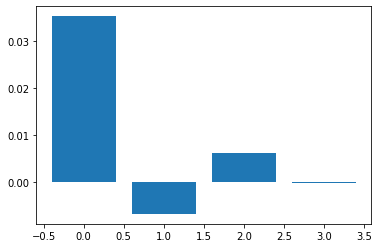

In [202]:
# linear regression feature importance

# our model will be a linear regression model 
model = LinearRegression()
# fit the model
model.fit(col_X_train, col_y_train)
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [203]:
#fitting random forest to assist with feature importance - different to the KNN model earlier 

#naming features 0 to as many exist within the model
feature_names = [f"feature {i}" for i in range(col_X_train.shape[1])]


#including random state in here so that it can be reproduced - arbitrary number is used 
random_forest_classifier = RandomForestClassifier(random_state=14)
random_forest_classifier.fit(col_X_train, col_y_train)

RandomForestClassifier(random_state=14)

In [204]:
#creating our MDI values using the random forest classifier 
feat_importances = random_forest_classifier.feature_importances_
std = np.std([tree.feature_importances_ for tree in random_forest_classifier.estimators_], axis=0)

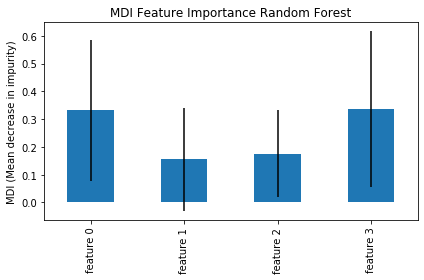

In [205]:
#plotting our MDI for features - this will make it easier to interpret 
forest_importances = pd.Series(feat_importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("MDI Feature Importance Random Forest")
ax.set_ylabel("MDI (Mean decrease in impurity)")
fig.tight_layout()

In [206]:
#correlation matrix

corr_matrix = a.corr()
print(corr_matrix)

                count_blinks  avg_diameter  fixation_count  saccade_count
count_blinks        1.000000      0.102463        0.056926      -0.040822
avg_diameter        0.102463      1.000000        0.074979      -0.028886
fixation_count      0.056926      0.074979        1.000000       0.740497
saccade_count      -0.040822     -0.028886        0.740497       1.000000


# Feature Importance second dataset 

In [167]:
#remove missing values - will not be able to convert  these for use in the modelling 

final = final.dropna()

In [168]:
ml_features = final[['CURRENT_SAC_DURATION', 'CURRENT_SAC_BLINK_END', 'RIGHT_PUPIL_SIZE_y']]

In [169]:
ml_target = final['task']

In [171]:
#apply floor because python can't work out that 2.0 is 2
ml_features['CURRENT_SAC_DURATION']=ml_features['CURRENT_SAC_DURATION'].apply(np.floor)
ml_features['CURRENT_SAC_BLINK_END']=ml_features['CURRENT_SAC_BLINK_END'].apply(np.floor)
ml_features['RIGHT_PUPIL_SIZE_y']=ml_features['RIGHT_PUPIL_SIZE_y'].apply(np.floor)

In [172]:
ml_features['CURRENT_SAC_DURATION']=ml_features['CURRENT_SAC_DURATION'].astype(int)
ml_features['CURRENT_SAC_BLINK_END']=ml_features['CURRENT_SAC_BLINK_END'].astype(int)
ml_features['RIGHT_PUPIL_SIZE_y']=ml_features['RIGHT_PUPIL_SIZE_y'].astype(int)

In [176]:
#test-train split

ml_X_train, ml_X_test, ml_y_train, ml_y_test = train_test_split(ml_features, ml_target, test_size=0.3, random_state=61)

Feature: 0, Score: -0.03824
Feature: 1, Score: 0.28948
Feature: 2, Score: -0.03502


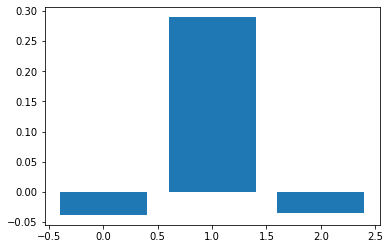

In [177]:
# linear regression feature importance

# our model will be a linear regression model 
model = LinearRegression()
# fit the model
model.fit(ml_X_train, ml_y_train)
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [178]:
#fitting random forest to assist with feature importance - different to the KNN model earlier 

#naming features 0 to as many exist within the model
feature_names = [f"feature {i}" for i in range(ml_X_train.shape[1])]


#including random state in here so that it can be reproduced - arbitrary number is used 
random_forest_classifier = RandomForestClassifier(random_state=14)
random_forest_classifier.fit(ml_X_train, ml_y_train)

RandomForestClassifier(random_state=14)

In [179]:
#creating our MDI values using the random forest classifier 
feat_importances = random_forest_classifier.feature_importances_
std = np.std([tree.feature_importances_ for tree in random_forest_classifier.estimators_], axis=0)

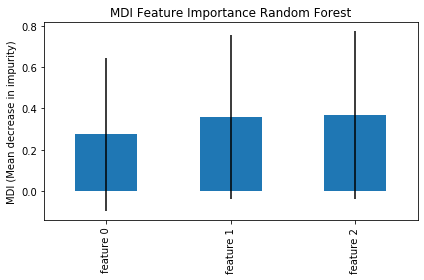

In [180]:
#plotting our MDI for features - this will make it easier to interpret 
forest_importances = pd.Series(feat_importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("MDI Feature Importance Random Forest")
ax.set_ylabel("MDI (Mean decrease in impurity)")
fig.tight_layout()

In [207]:
#correlation matrix

corr_matrix = final.corr()
print(corr_matrix)

                         RECORDING_SESSION_LABEL  CURRENT_SAC_DURATION  \
RECORDING_SESSION_LABEL                 1.000000              0.381533   
CURRENT_SAC_DURATION                    0.381533              1.000000   
CURRENT_SAC_BLINK_END                  -0.699913              0.285921   
RIGHT_PUPIL_SIZE_y                     -0.784572              0.048690   

                         CURRENT_SAC_BLINK_END  RIGHT_PUPIL_SIZE_y  
RECORDING_SESSION_LABEL              -0.699913           -0.784572  
CURRENT_SAC_DURATION                  0.285921            0.048690  
CURRENT_SAC_BLINK_END                 1.000000            0.926859  
RIGHT_PUPIL_SIZE_y                    0.926859            1.000000  


# SVM model

In [ ]:
#going to use a gridsearch in order to find the best estimators 
from sklearn.svm import SVC

#going to set C values from 0.1 to 10,000, gamma from 0.00001 to 1 and will test all kernels

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 0.00001]} 
#making use of gridsearch to find the optimal values - note verbose = 1 to limit the amount of output we see from python   
gridsearch = GridSearchCV(SVC(),  param_grid, refit = True, cv = 3, verbose = 1)
  
# fitting the gridsearch onto the model - using our training data 
gridsearch.fit(col_X_train, col_y_train)

In [ ]:
#Using our test set for prediction 

from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# We found our optimal hyperparameters found earlier, so will now initiate the model using these 
support_vc=SVC(C=10, gamma=1, kernel='rbf') 

# fit classifier to training set
support_vc.fit(col_X_train,col_y_train)

# make predictions on test set
y_pred=support_vc.predict(X_test)

confm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test,y_pred)

# getting the accuracy, confusion matrix, precision, recall, F1 and support
#goal here is to be able to compare appropriate metrics across all models - total digits = 4, found that having 2 was not enough and needed to be more granular

print(classification_report(y_test, y_pred, digits=4))
print('confusion matrix:')
print(confm)
print('accuracy:')
print(acc)